# Project: "We Rate Dogs" Twitter Data Wrangling

## Step 1: Gather Data

In [1]:
#Import Required Packages
import pandas as pd
import numpy as np
import requests
import os
import json


In [171]:
#Read twitter_archive_enhanced csv into a dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [172]:
#Load image_predictions.tsv from https:
import urllib.request
image_prediction, headers = urllib.request.urlretrieve('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
html = open(image_prediction)

df_image = pd.read_csv(html, sep = '\t')
df_image.head()
id_list = df_archive['tweet_id']



In [ ]:
#Query twitter data
#(retweet count and favorite count)
### keys were removed so code will not run

import tweepy
consumer_key = 'xxxxxxx'
consumer_secret = 'xxxxxx'
access_token = 'xxxxxx'
access_secret = 'xxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

id_list = df_archive['tweet_id']
#id_list = [892420643555336193, 892177421306343426, 891815181378084864, 891689557279858688, 891327558926688256,
 #          891087950875897856]
data = {}

count = 0
for id in id_list: 
    try: 
        tweet = api.get_status(id, tweet_mode='extended')
        retweet_count = (tweet.retweet_count)
        likes = (tweet.favorite_count)
        data[count] = {'id': str(id), 'retweet_count': retweet_count, 'likes': likes}
        count += 1
    except: 
        pass

with open('tweet_json.txt', 'w') as outfile:
    json.dump(data, outfile)
outfile.close()

pd_likes = pd.read_json('tweet_json.txt', orient='index', convert_axes=False)
outfile.close()

pd_likes.to_csv('twitter_likes.csv')

In [173]:
#Read the twitter file back in to perform assessments

df_likes = pd.read_csv('twitter_likes.csv')
df_likes.head()

,Unnamed: 0,id,likes,retweet_count
0,0,892420643555336192,39012,8659
1,1,892177421306343424,33399,6358
2,10,890006608113172480,30808,7447
3,100,872620804844003328,20998,3804
4,101,872486979161796608,41017,9220


#### At this point I have gathered three tables of information: 
1) df_archive (an archived list of tweets with score

2) df_image (image predictions)

3) df_likes (information gathered from Twitter)

Now I will proceed to the step of going through each data set and assessing for issues of Quality and Tidiness


## Step 2:  Assess Data

In [174]:
#Programmatic Assessment of df_archive

#checking to see how many unique "source" values in df_archive: 
df_archive.source.value_counts()

#Describing the dataset:
df_archive.info()

df_archive.name.describe()
df_archive.head()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [175]:
#Assessment of the names of dogs
df_archive.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [176]:
#Assessment of the rating_numerator:
df_archive.rating_numerator.unique()



array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [177]:
#Assessment of the rating_denominator: 
df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [178]:
#Programmatic Assessment of df_image
df_image.info()
df_image.describe()
df_image.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


As I performed the assessments on the three datasets mentioned above I documented the issues as either quality or tidiness issues. I performed both a visual and programmatic assessment. Here is the summary of the issues found. 

Quality:  

1) In df_archive there are retweets. The rows containing retweets needs to be removed.  

2) The names of the dogs are not correct for some of the tweets. These need to be corrected. Some of the names are "a", "None", "the". 

3) The ratings of some of the tweets (numerator and denominator) are not correct. These need to be corrected. I performed a visual assessment of the csv file and was able to see that there was a value of 5/10 (numerator/denominator). Looking at this value in particular it was appearant that the value was actually 9.5/10, and the numerator only pulled the 5. Also, in one case there were two ratings given, when the user actually intended to give the second rating. All provided ratings should be provided in this case and further investigated. 

4) In df_archive, the column "source" looked exactly the same for every row based on visual assessment. A programmatic assessment showed that most of the values (2221) were on the iphone. This column is most likely irrelevant and can be removed. 

5) In df_archive, the columns "doggo", "floofer", "pupper", and "puppo" contain the word "None" instead of N/A. The word "none" is also used in the names column, preventing missing entries for names from showing up as "NaN". 

6) The timestamp column in df_archive is a string, not a date.time object. This needs to be converted to a date time object. 

7) df_archive is missing the final rating, that is, numerator/denominator. 

8) In df_archive, expanded_url is missing values. This column can most likely be removed. 




Tidiness: 

1) In df_archive, doggo, floofer, pupper, and puppo are 4 seperate columns. This should be one column, "dog classification", that contains either dogo, floofer, pupper, or puppo. 

2) All the tables can be combined into one table containing the following columns: 
- Tweet id
- timestamp
- name of dog
- breed
- dog category
- number of retweets
- number of likes


## Step 3: Clean Data

In [179]:
#Make copies of the dataframes
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_likes_clean = df_likes.copy()


### Quality Issue #1: Remove all retweets



#### Define
Remove retweeted Tweet ID's by removing all rows containing data in retweeted_status_id. 

#### Code

In [180]:
#Code
#Remove columns containing non null values in retweeted_status_id: 

df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test

In [181]:
#Test
#Test to see if there are any more rows that contain values in retweeted_status_id column
df_archive_clean[df_archive_clean.retweeted_status_id.notnull()]
df_archive_clean.retweeted_status_id.describe()
df_archive_clean.retweeted_status_id.unique()
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [182]:
#Code: 
#Remove columns containing information about retweets. 
df_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)
df_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Quality Issue #2: Dog Names

#### Define

Replace invalid names ("a", "an", "the") with the expression "Invalid Name". Names of the dogs in the dataframe df_archive will be compared to a list compiled from 3 sources: 
- list of most common dog names
- list of most common female names
- list of most common male names

All three lists will be combined, converted to a list, and the code will iterate through the list of dog names in df_archive and compare to the combined list of most common names. If not in the list, the code will return "Invalid Name". 

#### Code

In [183]:
#Re-assess the column after removing retweet rows: 
df_archive_clean.name.describe()



count     2175
unique     956
top       None
freq       680
Name: name, dtype: object

In [184]:
#Import the list of most common female names
female_names = pd.read_csv('dist.female.first', sep = '\s+', header = None)

female_names.head()
female_names2= female_names[[0]]
female_names2.head()
female_names2.describe()


,0
count,4274
unique,4274
top,PATIENCE
freq,1


In [185]:
#Import the list of most common male names
male_names = pd.read_csv('dist.male.first', sep = '\s+', header = None)
male_names.head()
male_names2 = male_names[[0]]
male_names2.head()
male_names2.describe()


,0
count,1219
unique,1219
top,GLENN
freq,1


In [186]:
#Combine both female and male names into one dataframe to ease in appending to dog name list
human_names = female_names2.append(male_names2)
human_names.columns = ['DogName']
human_names.head()

,DogName
0,MARY
1,PATRICIA
2,LINDA
3,BARBARA
4,ELIZABETH


In [187]:
#Import list of most common dog names
dog_names = pd.read_csv('2018_dog_license2.csv')
dog_names.head()

,DogName
0,TUCKER
1,QUEEN TINY THE BANDIT
2,CHARLEY
3,TACODA
4,EICH


In [188]:
#Combine human and dog names into one dataframe
final_dog_list = dog_names.append(human_names, ignore_index = True)
final_dog_list.describe()


,DogName
count,26363
unique,9822
top,BELLA
freq,342


In [189]:
#Convert the dog name into a list to iterate over
name_list = final_dog_list['DogName'].tolist()

In [190]:
df_archive_clean.info()
df_archive_clean.iloc[2,9]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


'Archie'

In [191]:
#Iterate over the list of dog names in the dataframe and compare to the compiled list "name_list" to determine if the 
#name is a real name, or just an error ("a", "an", "the", etc.)

for i in range(0, len(name_list)):
    name_value = name_list[i]

    if type(name_list[i]) != str:
        continue
    else:
        name_list[i] = name_value.lower()
        

updated_names = []

for i in range(0, len(df_archive_clean)):
    original_name = ((df_archive_clean.iloc[i, 9]))
    original_name = original_name.lower()
    if original_name in name_list:
        updated_names.append(original_name)
    else:
        updated_names.append("Invalid Name")
        
print(updated_names)

['phineas', 'tilly', 'archie', 'darla', 'franklin', 'Invalid Name', 'jax', 'Invalid Name', 'zoey', 'cassie', 'koda', 'bruno', 'Invalid Name', 'ted', 'stuart', 'oliver', 'jim', 'zeke', 'Invalid Name', 'gerald', 'jeffrey', 'Invalid Name', 'Invalid Name', 'Invalid Name', 'Invalid Name', 'maya', 'Invalid Name', 'derek', 'roscoe', 'Invalid Name', 'waffles', 'Invalid Name', 'Invalid Name', 'Invalid Name', 'Invalid Name', 'earl', 'lola', 'kevin', 'Invalid Name', 'Invalid Name', 'yogi', 'noah', 'bella', 'Invalid Name', 'Invalid Name', 'rusty', 'gus', 'stanley', 'Invalid Name', 'koko', 'rey', 'gary', 'Invalid Name', 'Invalid Name', 'elliot', 'louis', 'Invalid Name', 'bella', 'jesse', 'Invalid Name', 'romeo', 'Invalid Name', 'bailey', 'Invalid Name', 'jack', 'steven', 'beau', 'snoopy', 'Invalid Name', 'shadow', 'emmy', 'aja', 'penny', 'dante', 'nelly', 'ginger', 'Invalid Name', 'benedict', 'Invalid Name', 'goose', 'nugget', 'Invalid Name', 'Invalid Name', 'cash', 'jed', 'Invalid Name', 'sebastia

In [192]:
#Append list of updated names to dataframe
updated_names_dataframe = pd.Series(updated_names)
df_archive_clean['new_names'] = updated_names_dataframe.values
df_archive_clean.head()
df_archive_clean.new_names.value_counts()

Invalid Name    1102
charlie           11
lucy              11
cooper            10
oliver            10
penny              9
tucker             9
sadie              8
lola               8
winston            8
toby               7
daisy              7
bella              6
an                 6
bo                 6
koda               6
jax                6
stanley            6
oscar              6
bailey             6
louis              5
milo               5
dave               5
chester            5
scout              5
buddy              5
rusty              5
bentley            5
leo                5
reggie             4
                ... 
maya               1
winifred           1
zeek               1
chelsea            1
rover              1
clifford           1
mojo               1
darby              1
harrison           1
tobi               1
norman             1
marty              1
ron                1
emmy               1
adele              1
carly              1
claude       

#### Test

In [193]:
#Look at the new values of names to determine if there are any more values "None", "a", "the"
df_archive_clean.head()
df_archive_clean.new_names.value_counts()

Invalid Name    1102
charlie           11
lucy              11
cooper            10
oliver            10
penny              9
tucker             9
sadie              8
lola               8
winston            8
toby               7
daisy              7
bella              6
an                 6
bo                 6
koda               6
jax                6
stanley            6
oscar              6
bailey             6
louis              5
milo               5
dave               5
chester            5
scout              5
buddy              5
rusty              5
bentley            5
leo                5
reggie             4
                ... 
maya               1
winifred           1
zeek               1
chelsea            1
rover              1
clifford           1
mojo               1
darby              1
harrison           1
tobi               1
norman             1
marty              1
ron                1
emmy               1
adele              1
carly              1
claude       

While there are more values that state "Invalid Name" it appears that the obviously invalid names ("a", "an", "the", "None") have been removed. In addition to removing these invalid names, this cleaning approach was slightly more conversative in that perhaps valid names that were not included in the list used for comparison were in fact dog names, it's just that these dog names were not included in the lists used. 

### Quality Issue #3: Incorrect Ratings

#### Define

Create a regex function that will pull out the rating from the column "text". The regex function should account for decimals and cases where more than one rating is provided. 

#### Code

In [194]:
#loop through and iterate using regex to provide the rating
updated_ratings_list = []
tweet_id_list = []
text_str_list = []
import re
regex = r"\d{1,4}.?\d{0,4}\/\d{1,4}"

for i in range(0, len(df_archive_clean)):
    text_str = ((df_archive_clean.iloc[i, 5]))
    new_rating = re.findall(regex,text_str)
    updated_ratings_list.append(new_rating)
   # if (new_rating == '.10/10'):
        #print(new_rating)
    

updated_ratings_dataframe = pd.DataFrame(updated_ratings_list)
updated_ratings_dataframe.head()


#Iterate through the list and take the last rating as the most likely accurate rating
#print(len(updated_ratings_dataframe.columns))

final_rating_list = []
for i in range(0, len(updated_ratings_dataframe)):
    #if i > 3:
     #   break
        
    ratings = []
    for j in range (0, len(updated_ratings_dataframe.columns)):
        curr_rating = updated_ratings_dataframe.iloc[i, j]
        #print(curr_rating)
        if curr_rating != None:
            ratings.append(curr_rating)
            
    if len(ratings) > 0:
        #print("rating len %d" % len(ratings))
        final_rating_list.append(ratings[-1])
        #print(final_rating_list)
    
#print(final_rating_list)
            
    


In [195]:
updated_ratings_dataframe = pd.Series(final_rating_list)
updated_ratings_dataframe.head()
df_archive_clean['new_ratings'] = updated_ratings_dataframe.values
df_archive_clean.head()
df_archive_clean.new_ratings.value_counts()

12/10       500
10/10       435
11/10       426
13/10       310
9/10        155
8/10        101
7/10         54
14/10        44
5/10         33
6/10         33
3/10         19
4/10         16
2/10         10
1/10          8
420/10        2
0/10          2
9.5/10        1
1776/10       1
007/10        1
13.5/10       1
9.75/10       1
11/15/15      1
144/120       1
80/80         1
99/90         1
24/7          1
11.26/10      1
182/10        1
44/40         1
666/10        1
88/80         1
121/110       1
11.27/10      1
20/16         1
84/70         1
143/130       1
4/20          1
45/50         1
204/170       1
165/150       1
15/10         1
3 13/10       1
60/50         1
Name: new_ratings, dtype: int64

#### Test

In [196]:
#Re-assess the ratings column
df_archive_clean.head()
df_archive_clean.new_ratings.value_counts()

12/10       500
10/10       435
11/10       426
13/10       310
9/10        155
8/10        101
7/10         54
14/10        44
5/10         33
6/10         33
3/10         19
4/10         16
2/10         10
1/10          8
420/10        2
0/10          2
9.5/10        1
1776/10       1
007/10        1
13.5/10       1
9.75/10       1
11/15/15      1
144/120       1
80/80         1
99/90         1
24/7          1
11.26/10      1
182/10        1
44/40         1
666/10        1
88/80         1
121/110       1
11.27/10      1
20/16         1
84/70         1
143/130       1
4/20          1
45/50         1
204/170       1
165/150       1
15/10         1
3 13/10       1
60/50         1
Name: new_ratings, dtype: int64

#### Quality Issue #3, Continued Definition
While it looks like the change did improve the ratings extracted from the text, there appears to be a number of remaining ratings that are still not correct: 
- 3 13/10
- 007/10


The approach I'll take now is to pull up these three rows and visually determine what the correct rating is, and then correct the rating. 

#### Code


In [197]:
#replace erroneous ratings
df_archive_clean['new_ratings'].replace('3 13/10', '13/10', regex=True, inplace=True)
df_archive_clean['new_ratings'].replace('007/10', '10/10', regex=True, inplace=True)


#### Test


In [198]:
#Test to see if the incorrect ratings are in the dataframe: 
df_archive_clean.new_ratings.value_counts()

12/10       500
10/10       436
11/10       426
13/10       311
9/10        155
8/10        101
7/10         54
14/10        44
5/10         33
6/10         33
3/10         19
4/10         16
2/10         10
1/10          8
420/10        2
0/10          2
1776/10       1
11/15/15      1
9.5/10        1
13.5/10       1
9.75/10       1
144/120       1
80/80         1
99/90         1
24/7          1
11.26/10      1
182/10        1
44/40         1
666/10        1
88/80         1
121/110       1
11.27/10      1
20/16         1
84/70         1
143/130       1
4/20          1
45/50         1
204/170       1
165/150       1
15/10         1
60/50         1
Name: new_ratings, dtype: int64

### Quality Issue # 4 Irrelevant Columns

#### Define: 
Remove irrelevant column "Source"



#### Code

In [199]:
#Remove the column "source"
df_archive_clean.head()
df_archive_clean.drop(['source'], axis = 1, inplace = True)

#### Test

In [200]:
#Preview the dataframe: 
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_names,new_ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,phineas,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,tilly,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,archie,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,darla,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,franklin,12/10


### Quality Issue #5 (The word "None" instead of NaN in columns doggo, floofer, pupper, and puppo)


#### Define
Change the word None to "NaN" in columns "doggo", "floofer", "pupper", and "puppo"

#### Code

In [201]:
#Change the word none to NaN for columns mentioned in the definition
df_archive_clean['doggo'].replace('None', np.NaN, inplace = True)
df_archive_clean['floofer'].replace('None', np.NaN, inplace = True)
df_archive_clean['pupper'].replace('None', np.NaN, inplace = True)
df_archive_clean['puppo'].replace('None', np.NaN, inplace = True)



#### Test

In [202]:
#Determine if there are any more "None" values for the columns
print(df_archive_clean['doggo'].unique())
print(df_archive_clean['floofer'].unique())
print(df_archive_clean['pupper'].unique())
print(df_archive_clean['puppo'].unique())
df_archive_clean.info()

[nan 'doggo']
[nan 'floofer']
[nan 'pupper']
[nan 'puppo']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
new_names                2175 non-null object
new_ratings              2175 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 351.9+ KB


### Quality Issue #6: The timestamp column in df_archive is a string, not a date.time object. 

#### Define
Convert the column timestamp in df_archive_clean to a date time object.

#### Code

In [203]:
#conversion of column to datetime object
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)

#### Test

In [204]:
#Test to see what the data type of timestamp is
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
new_names                2175 non-null object
new_ratings              2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 351.9+ KB


### Quality Issue #7: df_archive is missing final rating, numerator/denominator

#### Define
This issue was somewhat addressed in quality issue # 3 above (incorrect ratings). To make this data usable, it needs to be converted from a string to a float. 

#### Code

In [205]:
#Conversion of df_archive_clean['new_ratings'] to a fraction: 

score_float = []
for i in range (0, len(df_archive_clean)): 
    original_rating = df_archive_clean.iloc[i, 14]
    split_fraction = original_rating.split('/')
    numerator = float(split_fraction[0])
    denominator = float(split_fraction[1])
    float_score = numerator/denominator
    score_float.append(float_score)

float_ratings_dataframe = pd.Series(score_float)
float_ratings_dataframe.head()

#Append the updated scores to the df_archive dataframe: 

df_archive_clean['final_float_ratings'] = float_ratings_dataframe.values
df_archive_clean.head()
#df_archive_clean.new_ratings.value_counts()
#df_archive_clean.new_ratings_float = float(df_archive_clean.new_ratings)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_names,new_ratings,final_float_ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,phineas,13/10,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,tilly,13/10,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,archie,12/10,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,darla,13/10,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,franklin,12/10,1.2


#### Test

In [206]:
#Assess the new column of data (final float ratings), ensure it's a float
print(df_archive_clean.info())
print(df_archive_clean['final_float_ratings'].value_counts())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
new_names                2175 non-null object
new_ratings              2175 non-null object
final_float_ratings      2175 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 368.9+ KB
None
1.200000      504
1.000000      437
1.100000      432
1.300000      311


### Quality Issue #8: Removal of 'expanded_urls' column


#### Define
Remove the column 'expanded_urls' column from the dataframe. In addition to removing this column remove the other unnecessary columns (rating_numerator, rating_denominator, in_reply_to_user_id, in_reply_to_status_id)

#### Code

In [207]:
#Removal of columns listed above in "Define"

df_archive_clean.drop(['rating_numerator', 'rating_denominator', 'in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls'], axis = 1, inplace = True)



#### Test

In [208]:
#preview the dataframe to ensure columns were dropped

df_archive_clean.sample(50)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,new_names,new_ratings,final_float_ratings
652,792394556390137856,2016-10-29 15:55:58,Meet BeBe. She rocks the messy bun of your dre...,BeBe,NaN,NaN,NaN,NaN,bebe,12/10,1.2
2241,667915453470232577,2015-11-21 04:00:28,Meet Otis. He is a Peruvian Quartzite. Pic spo...,Otis,NaN,NaN,NaN,NaN,otis,10/10,1.0
528,808501579447930884,2016-12-13 02:39:32,This is Koda. He dug a hole and then sat in it...,Koda,NaN,NaN,NaN,NaN,koda,12/10,1.2
1685,681654059175129088,2015-12-29 01:52:46,This is Toffee. He's a happy pupper. Appears d...,Toffee,NaN,NaN,pupper,NaN,Invalid Name,12/10,1.2
2032,671763349865160704,2015-12-01 18:50:38,Say hello to Mark. He's a good dog. Always rea...,Mark,NaN,NaN,NaN,NaN,mark,9/10,0.9
448,819006400881917954,2017-01-11 02:21:57,This is Sunny. She was also a very good First ...,Sunny,doggo,NaN,NaN,NaN,sunny,14/10,1.4
1487,693095443459342336,2016-01-29 15:36:45,This is Milo. He doesn't understand your fancy...,Milo,NaN,NaN,pupper,NaN,milo,10/10,1.0
2052,671486386088865792,2015-12-01 00:30:04,This is Malcolm. He just saw a spider. 10/10 h...,Malcolm,NaN,NaN,NaN,NaN,malcolm,10/10,1.0
1992,672614745925664768,2015-12-04 03:13:46,This is Norman. Doesn't bark much. Very docile...,Norman,NaN,NaN,pupper,NaN,norman,6/10,0.6
1125,730196704625098752,2016-05-11 00:43:55,This is Charles. He's camera shy. Tail longer ...,Charles,NaN,NaN,NaN,NaN,charles,6/10,0.6


### Tidiness Issue #1: 
In df_archive, doggo, floofer, pupper, and puppo are 4 seperate columns. This should be one column, "dog classification", that contains either dogo, floofer, pupper, or puppo. 

#### Define
Change the columns in df_archive_clean into one column entitled dog classification, that contains either 'doggo', 'floofer' or puppo. 

#### Code

In [209]:
#Melting wouldn't work because of all the N/A values for values not provided, so a loop would be easier

for index, row in df_archive_clean.iterrows():
    doggo = row[4]
    floofer = row[5]
    pupper = row[6]
    puppo = row[7]

    if doggo == 'doggo':
        df_archive_clean.loc[index, "classification"] = 'doggo'
    elif floofer == 'floofer':
        df_archive_clean.loc[index, "classification"] = 'floofer'
    elif pupper == 'pupper':
        df_archive_clean.loc[index, "classification"] = 'pupper'
    elif puppo == 'puppo':
        df_archive_clean.loc[index, "classification"] = 'puppo'
    else: 
        df_archive_clean.loc[index, "classification"] = 'not provided'
        
   

#### Test

In [210]:

df_archive_clean.sample(50)


,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,new_names,new_ratings,final_float_ratings,classification
1107,734776360183431168,2016-05-23 16:01:50,This is Livvie. Someone should tell her it's b...,Livvie,NaN,NaN,NaN,NaN,Invalid Name,11/10,1.100,not provided
2313,666739327293083650,2015-11-17 22:06:57,This is Lugan. He is a Bohemian Rhapsody. Very...,Lugan,NaN,NaN,NaN,NaN,Invalid Name,10/10,1.000,not provided
1006,747648653817413632,2016-06-28 04:31:44,This is Keurig. He apparently headbutts other ...,Keurig,NaN,NaN,NaN,NaN,Invalid Name,12/10,1.200,not provided
507,812709060537683968,2016-12-24 17:18:34,This is Brandi and Harley. They are practicing...,Brandi,NaN,NaN,NaN,NaN,brandi,12/10,1.200,not provided
1227,713909862279876608,2016-03-27 02:05:49,This is Doug. His nose is legendary af. 12/10 ...,Doug,NaN,NaN,NaN,NaN,doug,12/10,1.200,not provided
1949,673689733134946305,2015-12-07 02:25:23,When you're having a blast and remember tomorr...,None,NaN,NaN,NaN,NaN,Invalid Name,11/10,1.100,not provided
229,848212111729840128,2017-04-01 16:35:01,This is Jerry. He's doing a distinguished tong...,Jerry,NaN,NaN,NaN,NaN,jerry,6/10,0.600,not provided
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,None,NaN,NaN,NaN,NaN,Invalid Name,11.26/10,1.126,not provided
1882,674999807681908736,2015-12-10 17:11:09,Ok last one of these. I may try to make some m...,None,NaN,NaN,NaN,NaN,Invalid Name,13/10,1.300,not provided
1066,740699697422163968,2016-06-09 00:19:04,This is Chip. He only mowed half the yard. 8/1...,Chip,NaN,NaN,NaN,NaN,chip,8/10,0.800,not provided


#### Code
Additional code for further removal of unnecessary columns

In [211]:
#Drop the extra unnecessary columns ('doggo', floofer', 'pupper', 'puppo', 'name', 'new_ratings')

df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'new_ratings', 'name'], axis =1)





In [212]:
df_archive_clean.head()

,tweet_id,timestamp,text,new_names,final_float_ratings,classification
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,phineas,1.3,not provided
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,tilly,1.3,not provided
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,archie,1.2,not provided
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,darla,1.3,not provided
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,franklin,1.2,not provided


In [213]:

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id               2175 non-null int64
timestamp              2175 non-null datetime64[ns]
text                   2175 non-null object
new_names              2175 non-null object
final_float_ratings    2175 non-null float64
classification         2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 198.9+ KB


In [214]:
df_archive_clean.to_csv('cleancopy1.csv')

### Tidiness Issue #2: Create one dataframe with all columns of interest

#### Define
Further clean df_likes and df_image for ease in merging with df_archive_clean. All three dataframes should have the same column, "tweet_id" which will be used for merging. Merge the three dataframes, df_archive, df_likes, and df_image. 

#### Code

In [215]:
df_likes.head()
df_likes.rename(columns = {'id': 'tweet_id'}, inplace = True)


In [216]:
df_likes.head()
df_likes.drop(['Unnamed: 0'], axis =1, inplace = True)

In [217]:
# Ensure df_image has tweet_id: 
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We don't need all this information, since I am most interested in the most probably breed based on the predictive model. The columns I will keep from this dataframe are tweet_id and p1, since that is the hight probability. 

In [218]:
#Create a copy of the dataframe with only the columns that we need: 

df_image_copy = df_image[['tweet_id', 'p1']].copy()
#new = old[['A', 'C', 'D']].copy()

In [219]:
df_image_copy.head()

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [220]:
df_image_copy.rename(columns = {'p1': 'predicted_breed'}, inplace = True)

In [221]:
df_likes.head()

,tweet_id,likes,retweet_count
0,892420643555336192,39012,8659
1,892177421306343424,33399,6358
2,890006608113172480,30808,7447
3,872620804844003328,20998,3804
4,872486979161796608,41017,9220


In [222]:
df_image_copy.head()

,tweet_id,predicted_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [223]:
#Merge dataframes
df_image_likes = pd.merge(df_likes, df_image_copy, on = 'tweet_id', how = 'outer')

In [224]:
df_image_likes_archive = pd.merge(df_image_likes, df_archive_clean, on ='tweet_id', how = 'outer')

In [225]:
df_image_likes_archive.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
0,892420643555336192,39012.0,8659.0,NaN,NaT,NaN,NaN,NaN,NaN
1,892177421306343424,33399.0,6358.0,NaN,NaT,NaN,NaN,NaN,NaN
2,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
3,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
4,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided


In [226]:
df_image_likes_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 0 to 2654
Data columns (total 9 columns):
tweet_id               2655 non-null int64
likes                  889 non-null float64
retweet_count          889 non-null float64
predicted_breed        2075 non-null object
timestamp              2175 non-null datetime64[ns]
text                   2175 non-null object
new_names              2175 non-null object
final_float_ratings    2175 non-null float64
classification         2175 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 207.4+ KB


In [227]:
df_image_likes_archive['likes'].unique()

array([  3.90120000e+04,   3.33990000e+04,   3.08080000e+04,
         2.09980000e+04,   4.10170000e+04,   3.45880000e+04,
         3.48150000e+04,   3.85110000e+04,   2.04930000e+04,
         2.04450000e+04,   0.00000000e+00,   2.11630000e+04,
         2.29380000e+04,   2.79280000e+04,   3.40890000e+04,
         1.20000000e+02,   1.26110000e+04,   8.38130000e+04,
         2.21330000e+04,   3.72140000e+04,   4.30630000e+04,
         2.86960000e+04,   1.62420000e+04,   2.07840000e+04,
         4.83290000e+04,   6.67570000e+04,   2.78680000e+04,
         1.03640000e+04,   2.46210000e+04,   3.46370000e+04,
         1.64900000e+04,   3.29060000e+04,   2.05490000e+04,
         2.73340000e+04,   1.97710000e+04,   1.24770000e+05,
         5.38450000e+04,   2.62160000e+04,   2.71310000e+04,
         2.86800000e+04,   3.31400000e+04,   1.49760000e+04,
         3.09540000e+04,   1.51730000e+04,   2.11640000e+04,
         1.56860000e+04,   2.44280000e+04,   2.32000000e+03,
         8.98400000e+03,

### Re-assessment

Looking at the merged dataframe, it's clear that there are missing values for retweets. I'm going to assume these values are zero. 
Additional cleaning of the dataframe requires: 

Quality:

Define: 

1) Changing the null values of tweets and retweets to zero

2) Dropping all rows that are na (these rows would only have tweet id's or only tweet id's and predicted breed.) 

Code: 

In [228]:
#Change the null values of likes and retweets to 0: 
df_image_likes_archive['likes'].replace(np.NaN, 0, inplace = True)
df_image_likes_archive['retweet_count'].replace(np.NaN, 0, inplace = True)

In [229]:
#Ensure there are no null values for retweets and likes
df_image_likes_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 0 to 2654
Data columns (total 9 columns):
tweet_id               2655 non-null int64
likes                  2655 non-null float64
retweet_count          2655 non-null float64
predicted_breed        2075 non-null object
timestamp              2175 non-null datetime64[ns]
text                   2175 non-null object
new_names              2175 non-null object
final_float_ratings    2175 non-null float64
classification         2175 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 207.4+ KB


In [230]:
#Drop all remaining rows that are NaN:
df_image_likes_archive = df_image_likes_archive[df_image_likes_archive.predicted_breed.notnull()]


In [231]:
df_image_likes_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 2 to 2519
Data columns (total 9 columns):
tweet_id               2075 non-null int64
likes                  2075 non-null float64
retweet_count          2075 non-null float64
predicted_breed        2075 non-null object
timestamp              1994 non-null datetime64[ns]
text                   1994 non-null object
new_names              1994 non-null object
final_float_ratings    1994 non-null float64
classification         1994 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 162.1+ KB


In [232]:
df_image_likes_archive = df_image_likes_archive[df_image_likes_archive.timestamp.notnull()]

In [233]:
df_image_likes_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2519
Data columns (total 9 columns):
tweet_id               1994 non-null int64
likes                  1994 non-null float64
retweet_count          1994 non-null float64
predicted_breed        1994 non-null object
timestamp              1994 non-null datetime64[ns]
text                   1994 non-null object
new_names              1994 non-null object
final_float_ratings    1994 non-null float64
classification         1994 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 155.8+ KB


In [234]:
df_image_likes_archive.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
2,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
3,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
4,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided
14,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided
17,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided


Save the cleaned dataframe to csv for further analysis: 

In [235]:
#Save cleaned dataframe to csv: 
df_image_likes_archive.to_csv('twitter_archive_master.csv')

## Analysis and Visualization

In [2]:
#Reload the clean dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [3]:
df.head()

,Unnamed: 0,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
0,2,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
1,3,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
2,4,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided
3,14,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided
4,17,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided


In [4]:
#Remove the first column that was imported 
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [5]:
df.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
0,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
1,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
2,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided
3,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided
4,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided


### Insights

There are a few possible insights to be drawn from this data. Here are a couple I chose to investigate: 

1. Is there a breed that received more likes than other breeds? How many likes on average does each breed receive?
2. Which classification resulted in the highest ratings? (This may be challenging, since the dog classification wasn't always provided). 
3. Is there a time of day (morning, noon, or afternoon) that people tweet the most about their dogs? 

Visualization: 
- I would like to provide a word cloud of different parts of the extracted tweet texts in the shape of a dog to illustrate how excited people are about their dogs!

#### Insight #1: Is there a breed of dogs that received more likes than other breeds? 

To answer this question I will look at comparing the likes for each of the breeds. To do this, I will need to group by breed, and then summarize the variables 'likes'.  



In [7]:
# Group by breed, then summarize the variables 

breed_likes = df.groupby(['predicted_breed'])['likes'].mean()



In [8]:
#Summarize the likes into a table or graph showing the most popular breeds
breed_likes.describe()

count      374.000000
mean      2789.882510
std       6020.398845
min          0.000000
25%          0.000000
50%          0.000000
75%       3180.687500
max      46549.000000
Name: likes, dtype: float64

In [9]:
#Convert to dataframe to get the breed associated with each number of likes

df_breed_likes = breed_likes.to_frame(name = 'likes')
df_breed_likes.head()

,likes
predicted_breed,
Afghan_hound,11365.333333
African_crocodile,0.000000
African_grey,5262.000000
African_hunting_dog,0.000000
Airedale,2230.583333


In [10]:
# Drop all zero values: 
df_breed_likes = df_breed_likes[(df_breed_likes != 0).all(1)]

In [11]:
#Add an index: 
df_breed_likes.reset_index(level=0, inplace=True)
df_breed_likes.head()


,predicted_breed,likes
0,Afghan_hound,11365.333333
1,African_grey,5262.000000
2,Airedale,2230.583333
3,American_Staffordshire_terrier,2315.461538
4,Angora,46549.000000


In [12]:
df_breed_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
predicted_breed    143 non-null object
likes              143 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [13]:
df_breed_likes.likes.describe()

count      143.000000
mean      7296.615797
std       7879.847069
min        420.763158
25%       2561.125000
50%       4559.550000
75%       9490.346154
max      46549.000000
Name: likes, dtype: float64

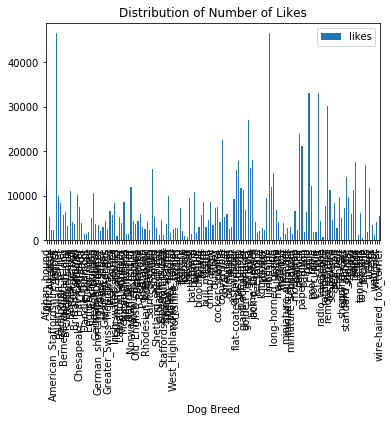

In [14]:
#summarize with a graph showing the breeds with the greatest number of likes: 
import matplotlib.pyplot as plt
%matplotlib inline
df_breed_likes.plot.bar(x = 'predicted_breed', y = 'likes')
labels = df_breed_likes.predicted_breed

plt.title('Distribution of Number of Likes')
plt.xlabel('Dog Breed')


Looking at the above graph it is not clear (due to the number of breeds) which are most liked. There are 143 total breeds in this data set. To get a better understanding of which breeds are most popular on the twitter site "We rate dogs", it makes more sense to take the top 20, for example, and look at the which breeds those are. 
Also interesting is that the number of likes falls mostly below 10,000 (75%). There are less than 25% of the breeds in this subset of data that are greater than that, with the max at 46,549. It'll be interesting to see which breeds got the highest likes. 
Below please find the subset of the 20 highest liked breeds, as well as the summary of the number of likes for the most popular breeds. 

In [15]:
#find the greatest 20 likes in the dataframe df_breed_likes
df_breed_likes_largest = df_breed_likes.nlargest(40, 'likes')

In [16]:
df_breed_likes_largest.describe()

,likes
count,40.000000
mean,16577.685617
std,9590.481587
min,8463.250000
25%,10402.471719
50%,11975.642857
75%,17899.850000
max,46549.000000


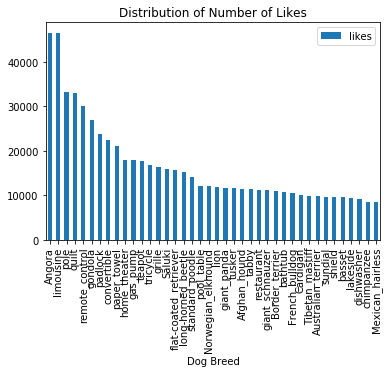

In [17]:
df_breed_likes_largest.plot.bar(x = 'predicted_breed')
x_labels = df_breed_likes.predicted_breed
labels = x_labels

plt.title('Distribution of Number of Likes')
plt.xlabel('Dog Breed')

It looks like, from this plot, there were actually no dog breeds that had over 40,000 likes. Angora is a cat breed. Also, the machine learning model that was used to pull some of these dog breeds based on a picture didn't get all the top liked tweets correct. Starting with the first actual dog breed, it looks like the most liked breed is the Saluki, followed by breeds like flat-coated retriever, standard poodle and the norweigen elkhound. Of course, there may actually be a few breeds that received greater than 20,000 likes, and the machine learning algorithm just didn't identify the breed correctly. 
Despite not knowing exactly which breeds received the most likes, we can say that the average number of likes for the breeds in this dataset is 7,297 and 75% of the breeds (correctly or incorrectly identified) received 17,900 likes or less. 

### Insight #2: Which classification resulted in the highest rating? 

The next area I'll explore is determining which classifications resulted in the highest ratings given by the dog owner. The classifications that I'm referring to are doggo (big pupper, usually older), floofer (dogs with excess fur), pupper (small dogs, usually younger), and puppo (transitional phase between pupper and doggo). This was a limited data set to begin with. That is, although there are 1994 tweet id's, most of the tweet id's did not provide this classification.  

The "Final float ratings" is a converted rating given to the dog by the person tweeting. These numbers started as fraction and were extracted from the tweet text. For example, a rating of value of 1.2 is actually a rating of 12/10. That is, their dog is of course so great that the numerator exceeds the denominator. 

In [18]:
#Group by category to determine the average rating per classification
classification_ratings = df.groupby
classification_ratings = df.groupby(['classification'])['final_float_ratings'].mean()

In [19]:
classification_ratings.head()

classification
doggo           1.178378
floofer         1.200000
not provided    1.175758
pupper          1.062202
puppo           1.200000
Name: final_float_ratings, dtype: float64

It looks like the order of ranking for scores is: 

1) Floofer and puppo tied at 1.2

2) Doggo at 1.178

3) Pupper at 1.066

Whether or not these ranking are significant, they do seem to make some sense. That is, puppies ("pupper") are a lot of work, requiring extra attention and training. Floofers are fluffy, one of the main draws of having a pet, and puppo is the stage beyond the high attention needs of a pupper but still plenty of energy to play. 
And of course, it makes sense that people would rank their Doggo higher than a new puppy, especially if the owner has had the dog for a long time. 


### Insight #3: Is there a time of day that people tweet the most about their dogs? 

Just out of curiosity, it would be interesting to find out when people are most active on twitter when tweeting about their dogs. Before the analysis occurs, I'm going to guess afternoon or evening, since that's when most people are leisurely spending time with their dogs. 
What this will entail is adding a column to the dataframe (morning, afternoon, evening, or night). The way I will classify the times are as follows: 

6am - 12am : Morning (hour 6 - 12)

12pm - 5 pm: Afternoon (hour 12 - 17)

5pm - 9 pm: Evening (hour 17-21)

9 pm - 6 am: Night (hour 21-24, 0-6)

In [20]:
#Convert the datetime into a datetime object: 
df['timestamp'] = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 9 columns):
tweet_id               1994 non-null int64
likes                  1994 non-null float64
retweet_count          1994 non-null float64
predicted_breed        1994 non-null object
timestamp              1994 non-null datetime64[ns]
text                   1994 non-null object
new_names              1994 non-null object
final_float_ratings    1994 non-null float64
classification         1994 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 140.3+ KB


In [21]:
df.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
0,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
1,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
2,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided
3,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided
4,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided


In [22]:
#Extract the hour from each timestamp for further classification into bins: 
for index, row in df.iterrows():
    time = row[4]
    df.loc[index, "extracted_hour"] = time.hour
    

In [23]:
df.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification,extracted_hour
0,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided,0.0
1,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided,1.0
2,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided,16.0
3,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided,0.0
4,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided,20.0


In [24]:
#Divide up the hour according to bins outlined in the description above: 

# Bin edges that will be used to "cut" the data into groups
bin_edges = [-0.1, 6.0, 12.0, 17.0, 21.0, 24.1] 

#Step 3:
# Labels for the five time of day groups
bin_names = [ 'early morning', 'morning' , 'afternoon','evening', 'night' ] # Name each acidity level category

#Step 4:
# Creates part of day column
df['part_of_day'] = pd.cut(df['extracted_hour'], bin_edges, labels=bin_names)


#Step 5:
# Find the count for the number of tweets for each time of day category.
df.groupby('part_of_day').count()




,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification,extracted_hour
part_of_day,,,,,,,,,,
early morning,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036
morning,0,0,0,0,0,0,0,0,0,0
afternoon,455,455,455,455,455,455,455,455,455,455
evening,327,327,327,327,327,327,327,327,327,327
night,176,176,176,176,176,176,176,176,176,176


I wasn't surprised by this information. The time shown above is UTC time, which is 4 hours ahead of EST. So the bins are actually as follows: 
For the purpose of this analysis, we'll assume EST, although tweets are most likely from other parts of the country and world on different time zones. Most of the US is either on EST or central (which is only 1 hour from EST). 

Early morning (0 -6 am UTC) : (4am - 10 am EST)

Morning (6 - 12 am UTC): (10am - 4 pm EST)

Afternoon (12 pm - 5 pm UTC): (4 pm - 9 pm EST)

Evening (5 pm - 9 pm UTC): (9 pm - 1 am EST) 

Night (9 pm - 12 midnight) : (1 am - 4 am EST)

Most tweets occurred between the hours of 4 am and 10 am EST, which makes sense, since dogs need to be walked in the morning, and that's when most people are out with their dogs. What I found interesting is that no tweets in this dataset are between 10 am and 4 pm. Although most people are working between those hours, I found it surprising that 0 tweets occurred during that time (in this dataset). 

Also not surprising is that the next most popular time was between the hours of 4 and 9 pm (dogs also need their second walk of the day), followed by 9 p -1 am , and then 1 am until 4 am. 
To be sure my classification was correct, I double checked the values of the values of the extracted hour in the code block below. 

In [25]:
df['extracted_hour'].unique()

array([  0.,   1.,  16.,  20.,   4.,  19.,  23.,  17.,   3.,  15.,  18.,
        22.,  21.,   2.,   6.,  14.,   5.,  13.])

#### Visual: Word cloud of texts and descriptions about the dogs

Each tweet id in this dataframe has texts associated with the tweet. These words are typically words used to describe their dogs, as well as might they might be doing in the picture. 

A word cloud is a great way to represent a summary of the tweets about how people feel about their dogs, and why they tweet about them (or at least the people in this dataset). 



In [27]:
#Download packages required for wordcloud: 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

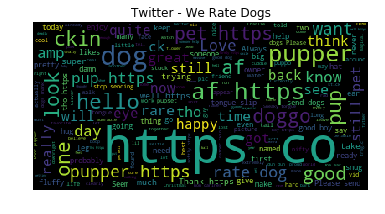

In [33]:
#Generate the word cloud image
wordcloud = WordCloud().generate(''.join(df['text']))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
stopwords = set(STOPWORDS)
stopwords.add("https")
plt.title("Twitter - We Rate Dogs")
plt.show()


#wordcloud2 = WordCloud().generate(' '.join(text2['Crime Type']))